In [1]:
#Training on Single Image
import cv2
from matplotlib import pyplot as plt

img=cv2.imread('test_images/0 (237).jpg',0)
height,width=img.shape
imgFlatten=img.reshape(height*width,1)


In [2]:
from sklearn.cluster import KMeans

model=KMeans(n_clusters=6)
model.fit(imgFlatten)
labels=model.labels_
labels2D=labels.reshape(height,width)

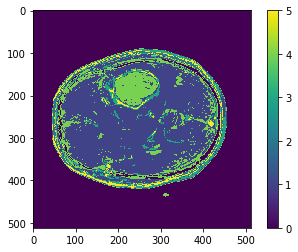

In [3]:
plt.imshow(labels2D)
plt.colorbar()
plt.show()

In [5]:
# detecting tumor on set of images
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
tumorLabel=4


In [6]:
test_img_path='test_images'
test_img_names=os.listdir(test_img_path)
for test_img_name in test_img_names:
    img_path=os.path.join(test_img_path,test_img_name)
    img=cv2.imread(img_path,0)
    img_original=cv2.imread(img_path)
    height,width=img.shape
    imgFlatten=img.reshape(height*width,1)
    labels=model.predict(imgFlatten)
    labels2D=labels.reshape(height,width)
    mask=(labels2D==tumorLabel)
    tumorExtracted=np.bitwise_and(mask,img)
    contours, hierarchy = cv2.findContours(tumorExtracted, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    print('no. contours:',len(contours))
    for i,cnt in enumerate(contours):
    #cv2.drawContours(frame, [cnt], 0, (0,255,255), 3)
        area=cv2.contourArea(cnt)
        #print(area) 
        if(area>1000):
            cv2.drawContours(img_original, [cnt], -1, (0,255,255), 2)
            x,y,w,h = cv2.boundingRect(cnt)
            cv2.rectangle(img_original,(x,y),(x+w,y+h),(0,255,0),2)
            cv2.rectangle(img_original,(x,y),(x+120,y-40),(0,255,0),-1)
            cv2.putText(img_original,"TUMOR",(x+10,y-10),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2)
            cv2.imshow("Detection",img_original)
            cv2.waitKey(2000)
cv2.destroyAllWindows()

no. contours: 1645
no. contours: 3113
no. contours: 2734
no. contours: 2920
no. contours: 3076
no. contours: 2453
no. contours: 2357
no. contours: 2734
no. contours: 2894
no. contours: 1726
no. contours: 1742
no. contours: 1075
no. contours: 1586
